<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Batch/blob/main/BPL_TEST2_Batch_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Batch script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_TEST2_Batch is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2024-03-05 07:11:38--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74403966 (71M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py310_23 100%[===================>]  70.96M  95.1MB/s    in 0.7s    

2024-03-05 07:11:39 (95.1 MB/s) - ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’ saved [74403966/74403966]

PREFIX=/usr/local
Unpacking payload ...
                                                                               
Installing base environment...





Preparing transaction: - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd3eb1b0_0          47 KB
    boltons-23.0.0             |  py310h06a4308_0         430 KB
    brotli-python-1.0.9        |  py310h6a678d5_7         907 KB
    bzip2-1.0.8                |       h5eee18b_5         262 KB
    c-ares-1.19.1              |       h5eee18b_0         118 KB
    ca-certificates-2023.12.12 |       h06a4308_0         126 KB
    certifi-2024.2.2           |  py310h06a4308_0         159 KB
    cffi-1.16.0                |  py310h5eee18b_0         253 KB
    conda-24.1.2               |  py310h06a4308_0         985 KB
    conda-libmamba-solver-24.1.0|     pyhd3eb1b0_0          39 KB

In [ ]:
!conda --version
!python --version

conda 24.1.2
Python 3.10.13


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    assimulo-3.4.3             |  py310hd2a66c7_3         2.0 MB  conda-forge
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    conda-24.1.2               |  py310hff52083_0         947 KB  conda-forge
    fmilib-2.4.1               |       h59595ed_0         383 KB  conda-forge
    gmp-6.3.0                  |       h59595ed_0         550 KB  conda-forge
    libblas-3.9.0              |21_linux64

# BPL_TEST2_Batch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Batch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Batch_explore.me.py

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Batch

Cloning into 'BPL_TEST2_Batch'...


In [ ]:
%cd BPL_TEST2_Batch

/content/BPL_TEST2_Batch/BPL_TEST2_Batch


In [ ]:
run -i BPL_TEST2_Batch_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Batch - demo



No processDiagram.png file in the FMU, but try the file on disk.


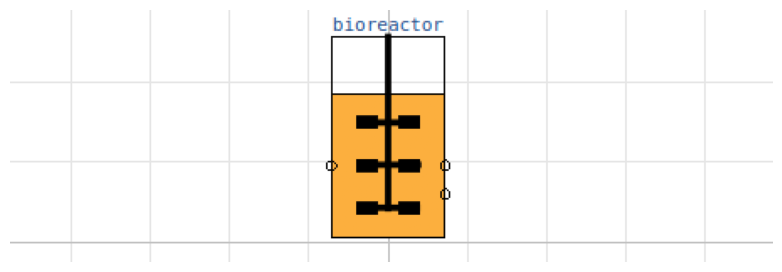

In [ ]:
process_diagram()

In [ ]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



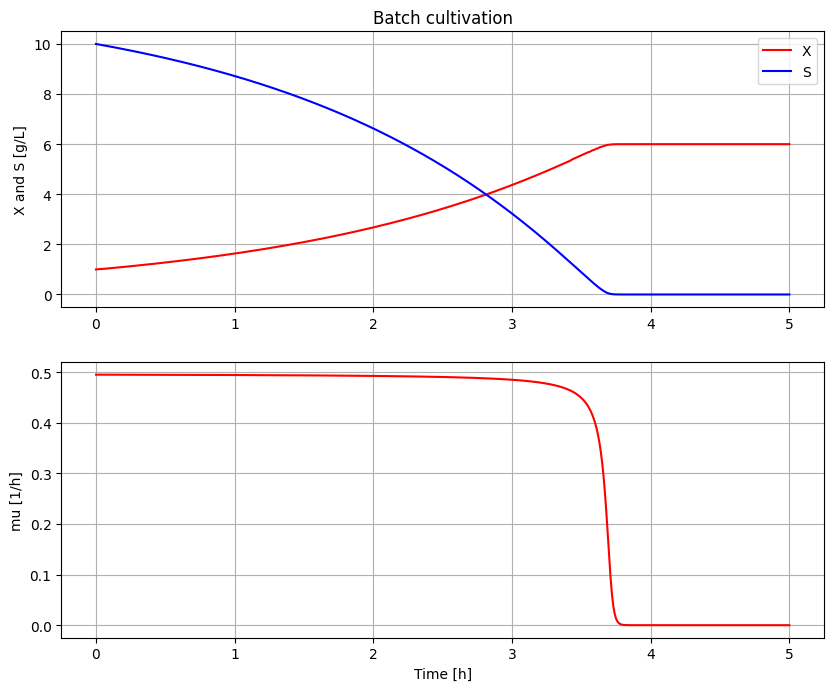

In [ ]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

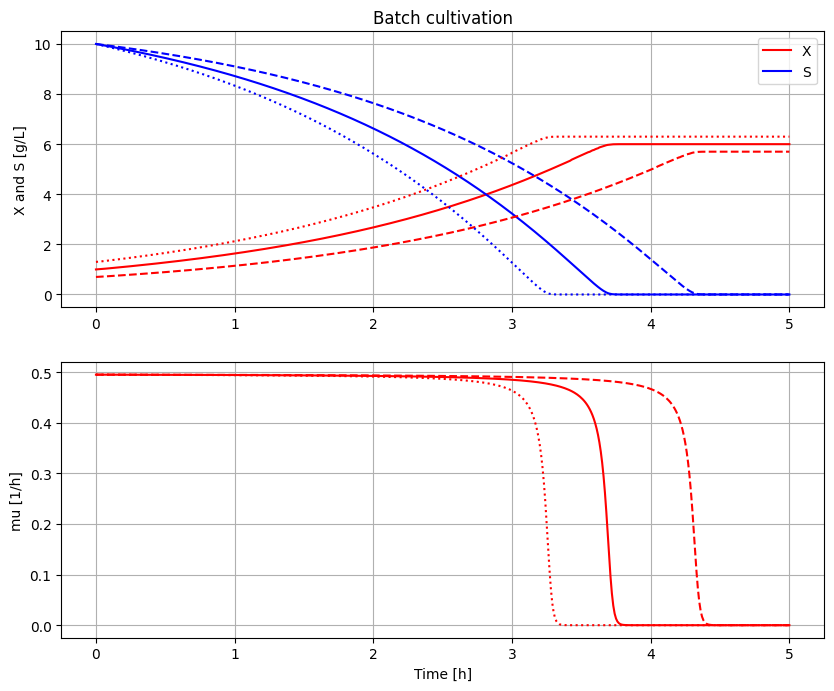

In [ ]:
# Simulation were initial value of biomass VX_0 is varied
newplot(plotType='TimeSeries')
for value in [1.0, 0.7, 1.3]: init(VX_start=value); simu(5)

# Restore default value of VX_start
init(VX_start=1.0)

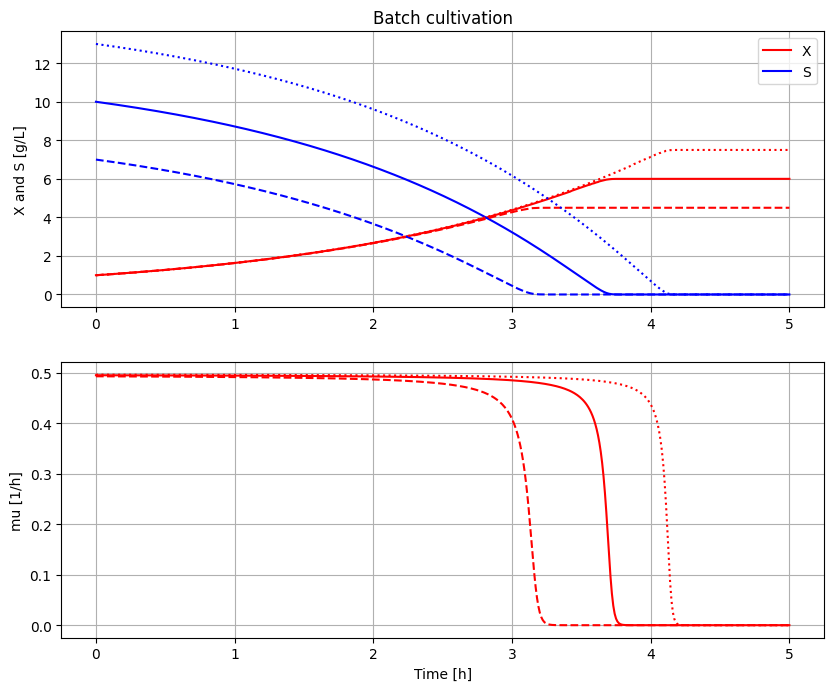

In [ ]:
# Simulation were initial value of substrate VS_0 is varied
newplot(plotType='TimeSeries')
for value in [10, 7, 13]: init(VS_start=value); simu(5)

# Restore default value of VS_start
init(VS_start=10)

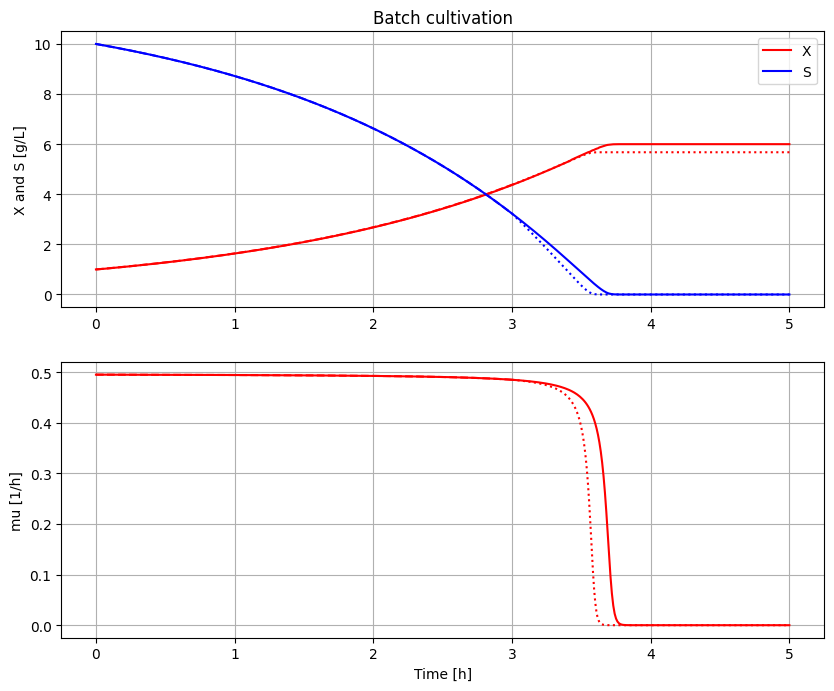

In [ ]:
# Simulation where metabolism is changed after 3 hours
newplot(plotType='TimeSeries')
simu(5)

simu(3)
par(Y=0.4, qSmax=1.0/(0.4/0.5)); simu(2, 'cont')

# Restore default value of Y and qSmax
par(Y=0.5, qSmax=1.0)

In [ ]:
disp('culture')

Y : 0.4
qSmax : 1.25
Ks : 0.1


In [ ]:
describe('mu')

Cell specific growth rate variable : 0.0 [ 1/h ]


In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture']


In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: none


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -PyFMI: 2.11.0
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_TEST2.Batch
 -Generated: 2024-03-05T08:05:44Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore version 0.9.9
